# Bax452 Machine Learning Pre- Assessment _Jiaqi Liu

## Load the Data

The data is downloaded from Kaggle Titanic Competition. The data has been split into two groups:

training set (train.csv)
test set (test.csv)

The training set is used to build the machine learning models. 
The test set is used to see how well the model performs on unseen data.

### Import libraries

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)

### Load dataset into Pandas

In [46]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
full_data = [train, test]
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA 

###    Apply function that transforms a column

In [22]:
def cabin(x):
    if type(x) == float:
        return 0
    else:
        return 1
    
train["cabin_exists"] = train["Cabin"].apply(cabin)
test["cabin_exists"] = train["Cabin"].apply(cabin)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_exists
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


### Explorary data visualization

#### 1. Sex

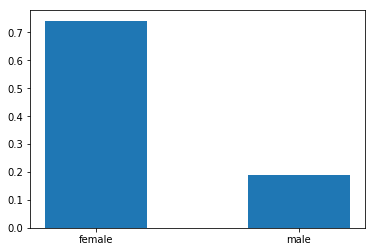

In [41]:
df = train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean()
heights = df["Survived"]
position =arange(2) + 1
tick_positions = range(1,3)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Sex"].values)
plt.show()

#### 2.  Class

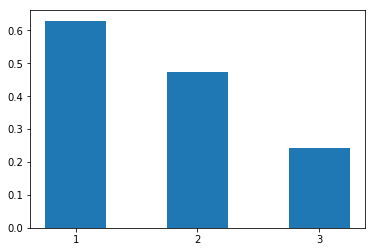

In [42]:
df = train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
heights = df["Survived"]
position =arange(3) + 1
tick_positions = range(1,4)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Pclass"].values)
plt.show()

#### 3. Embarked

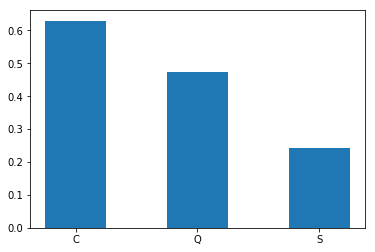

In [56]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
df = train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
heights=df["Survived"]
position =arange(3) + 1
tick_positions = range(1,4)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.5)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Embarked"].values)
plt.show()


#### 4.Age 

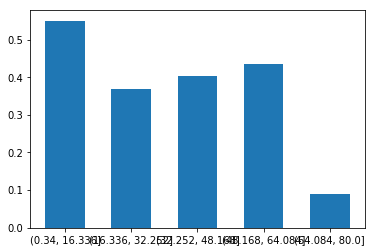

In [72]:
train['Age_group'] = pd.cut(train['Age'], 5)
df = train[['Age_group', 'Survived']].groupby(['Age_group'], as_index=False).mean()
heights=df["Survived"]
position =arange(5) + 1
tick_positions = range(1,6)
fig, ax = plt.subplots()
ax.bar(position, heights, 0.6)
ax.set_xticks(tick_positions)
ax.set_xticklabels(df["Age_group"].values)
plt.show()

In [ ]:
dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

## Build ML models

### Random Forest 

In [83]:
np.random.seed(910526)
train, test = train_test_split(train, test_size = 0.5)
features = ['Pclass','Sex','Age']

rf = RandomForestClassifier(n_estimators=500, n_jobs=-1, criterion="entropy", random_state=1)
#features = list(train.columns[2:5])
clf=rf.fit(train[features], train['Survived'])
print(clf)
importances = clf.feature_importances_
print(importances)

KeyError: 'Survived'